Коэффициент наклона: -0.14071 ± 0.00744
Свободный параметр: 110.31500 ± 2.33106


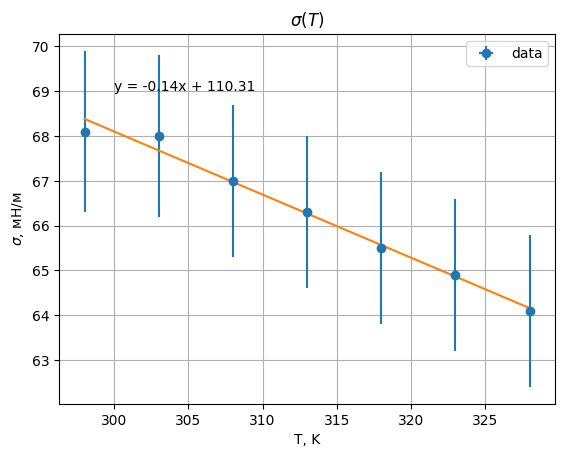

In [18]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# данные

my_data = genfromtxt('sigmaT.csv', delimiter=',')

first, second, xerr, yerr = [], [], [], []
for element in my_data:
    second.append(element[2])
    yerr.append(element[3])
    first.append(element[0])
    xerr.append(element[1])

x = np.array(first)
y = np.array(second)

dx = np.array(xerr)
dy = np.array(yerr)

# метод наименьших квадратов
p, V = np.polyfit(x, y, 1, cov=True)
y_fit = np.polyval(p, x)

# построение графика
plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o', label='data')
plt.plot(x, y_fit)

# вывод коэффициента наклона с погрешностью
slope = p[0]
slope_error = np.sqrt(V[0][0])

b = p[1]
b_error = np.sqrt(V[1][1])

print('Коэффициент наклона: {:.5f} ± {:.5f}'.format(slope, slope_error))
print('Свободный параметр: {:.5f} ± {:.5f}'.format(b, b_error))

plt.text(300, 69, 'y = {:.2f}x + {:.2f}'.format(slope, b))


# название графика 
plt.title('$ \sigma(T) $')

# название горизонтальной оси 
plt.xlabel('T, K')

# название вертикальной оси
plt.ylabel('$ \sigma $, мН/м')

plt.grid()

plt.legend()
plt.show()
